
* Since matplotlib.finance has been removed from ver 2.2 an alternative source for matplotlib.finance is available at following link: downloading mpl_finance from github: pip install https://github.com/matplotlib/mpl_finance/archive/master.zip
* Here is the link that could be used as a temporary fix for pandas.DataReader problem: https://pypi.org/project/fix-yahoo-finance/0.0.11/

In [2]:
# Importing standard Libraries
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [16]:
# Importing external libraries
import quandl as ql
import mpl_finance as mpl
import matplotlib.ticker as mticker

In [50]:
# Setting start date
startdate = dt.date(2018,1,1)
enddate = dt.date.today()

In [51]:
# Downloading NIFTY50 index from quandl.com API
NIFTY50 = ql.get("NSE/NIFTY_50", authtoken="34VkeK5bFLvtaEprKmFX", start_date=startdate, end_date=enddate)
ohlc_data = NIFTY50[['Open','High','Low','Close']] # Selecting ohlc data from the data dump

In [55]:
# Inspecting the data
print(ohlc_data.head())
print(ohlc_data.info())
print(ohlc_data.describe())

                Open      High       Low     Close
Date                                              
2018-01-01  10531.70  10537.85  10423.10  10435.55
2018-01-02  10477.55  10495.20  10404.65  10442.20
2018-01-03  10482.65  10503.60  10429.55  10443.20
2018-01-04  10469.40  10513.00  10441.45  10504.80
2018-01-05  10534.25  10566.10  10520.10  10558.85
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 73 entries, 2018-01-01 to 2018-04-30
Data columns (total 4 columns):
Open     73 non-null float64
High     73 non-null float64
Low      73 non-null float64
Close    73 non-null float64
dtypes: float64(4)
memory usage: 2.9 KB
None
               Open          High           Low         Close
count     73.000000     73.000000     73.000000     73.000000
mean   10505.487671  10551.121918  10451.657534  10504.088356
std      234.983968    232.315382    239.628048    239.772391
min     9968.800000  10027.700000   9951.900000   9998.050000
25%    10391.000000  10426.100000  10328.500000  1

#### Basic Plot

No handles with labels found to put in legend.


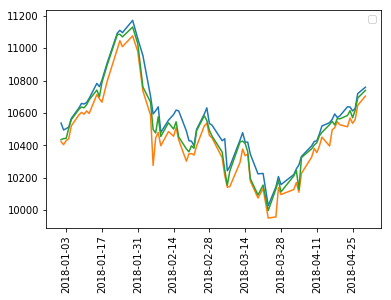

In [56]:
plt.plot(ohlc_data.iloc[:,1:])
plt.legend(loc='best')
plt.xticks(rotation=90)
plt.show()

ValueError: not enough values to unpack (expected 5, got 4)

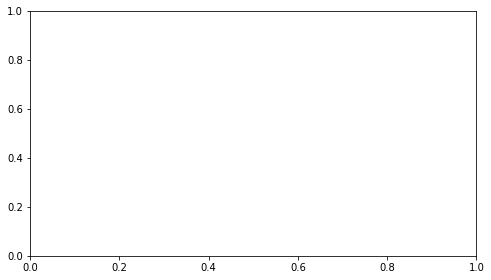

In [57]:
fig, ax = plt.subplots(figsize=(8,5))
fig.subplots_adjust(bottom=0.2)
mpl.candlestick_ochl(ax,ohlc_data,width=0.6,colorup='g', colordown='r')
plt.grid(True)
ax.xaxis_date() # For dates on x-axis
ax.autoscale_view()
plt.setp(plt.gca().get_xticklabels(), rotation=90)
plt.show()